### Pima Indians Diabetes Database

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. 

UCI Machine Learning (Owner) _ Kaggle Team (Admin)

Aknowledgment:

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988).
Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. 
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).
IEEE Computer Society Press.

### Features:
1) Pregnancies: Number of times pregnant

2) Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3) BloodPressure: Diastolic blood pressure (mm Hg)

4) SkinThickness: Triceps skin fold thickness (mm)

5) Insulin: 2-Hour serum insulin (mu U/ml)

6) BMI: Body mass index(weight in kg/(height in m)^2)

7) DiabetesPedigreeFunction

8) Age (years)

9) Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Goal: build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not

### Data pre-processing

In [5]:
import pandas as pd #Library for Data Analysis
import numpy as np #Library for Scientific Computing
import matplotlib.pyplot as plt #Library for Data Visualization
import seaborn as sns #Library for Data Visualization


from sklearn.model_selection import train_test_split, GridSearchCV #Machine Learning library for splitting dataset
from sklearn.preprocessing import StandardScaler #Machine Learning library for Features scaling
from sklearn.preprocessing import PolynomialFeatures #Machine Learning library for Features Engineering

from sklearn.linear_model import LogisticRegression #Machine Learning library for implementing logistic reg moddel
from sklearn.svm import SVC #MMachine Learning library for implementing Support vector machine
from sklearn.neighbors import KNeighborsClassifier #Machine Learning library for implementing KNN Classifier
from sklearn.naive_bayes import GaussianNB #Machine Learning library for implementing NB Classifier

from sklearn.tree import DecisionTreeClassifier,plot_tree #Machine Learning libraries for implementing and plotting Decision Tree
from sklearn.ensemble import RandomForestClassifier #Machine Learning library for implementing Random Forest

from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA#to reduce the dimensionality to 2 for visualization.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Machine Learning library for Model evaluation
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report #Machine Learning library for Model evaluation

In [6]:
data=pd.read_csv("C:/Users/Hosam/Desktop/Projects/ML/Pima Indians Diabetes Database (Classification)/diabetes.csv")

In [7]:
#To take overall look of the data
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
#Checking data columns names, type and data shap 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Help in gaining statistical summary of the data
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#To check if any of the columns have Null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#

### Columns Distribution

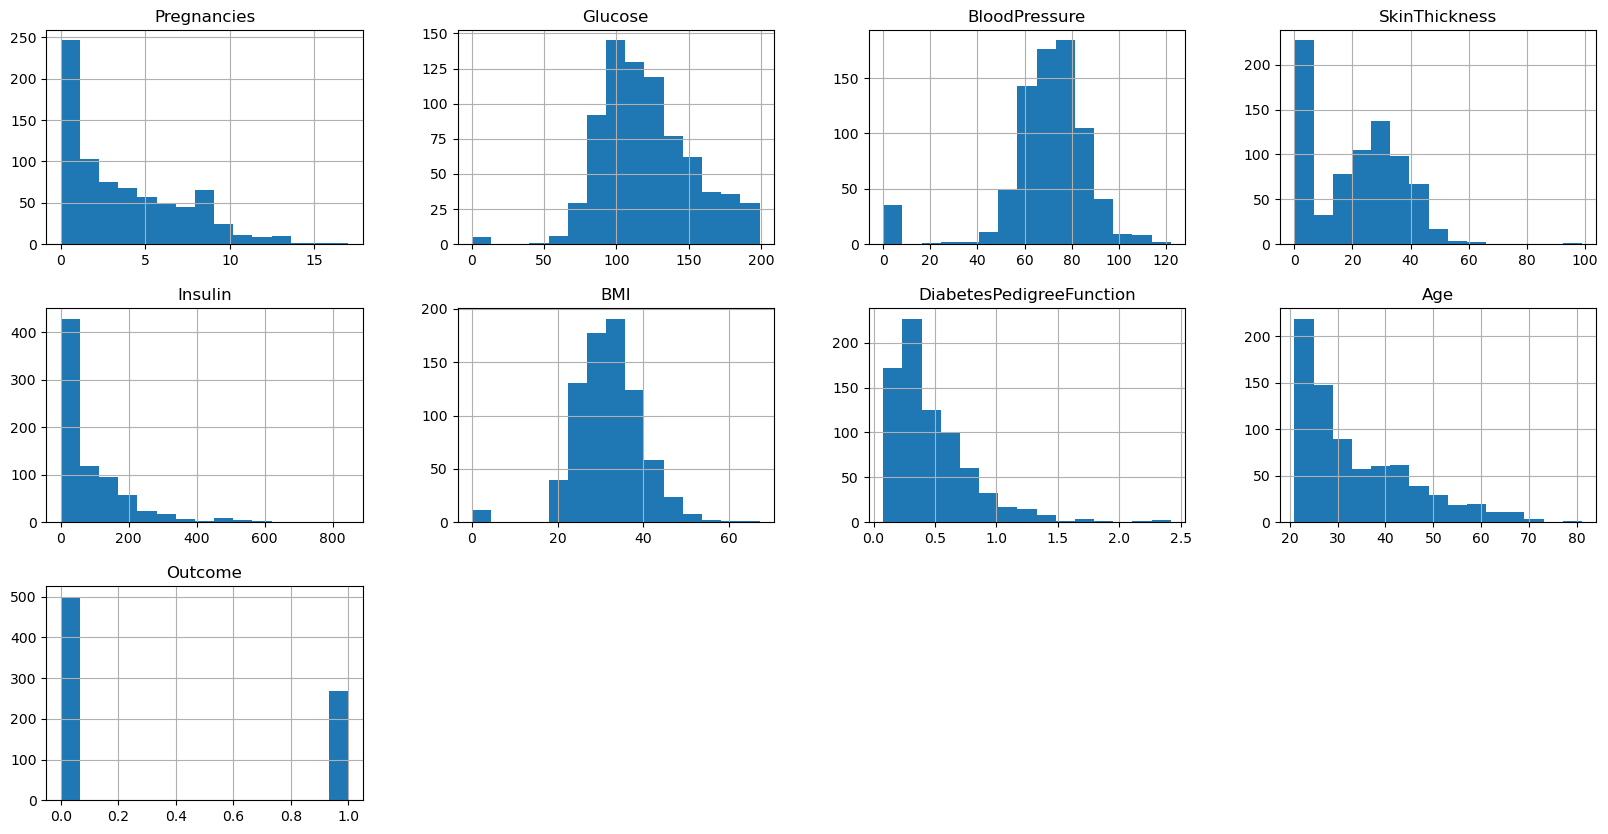

In [13]:
#The Histograms will help in understanding the spread and identifying any outliers.
data.hist(bins=15,figsize=(20,10), layout=(3,4))
plt.show()

C:\Users\Hosam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hosam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hosam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hosam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

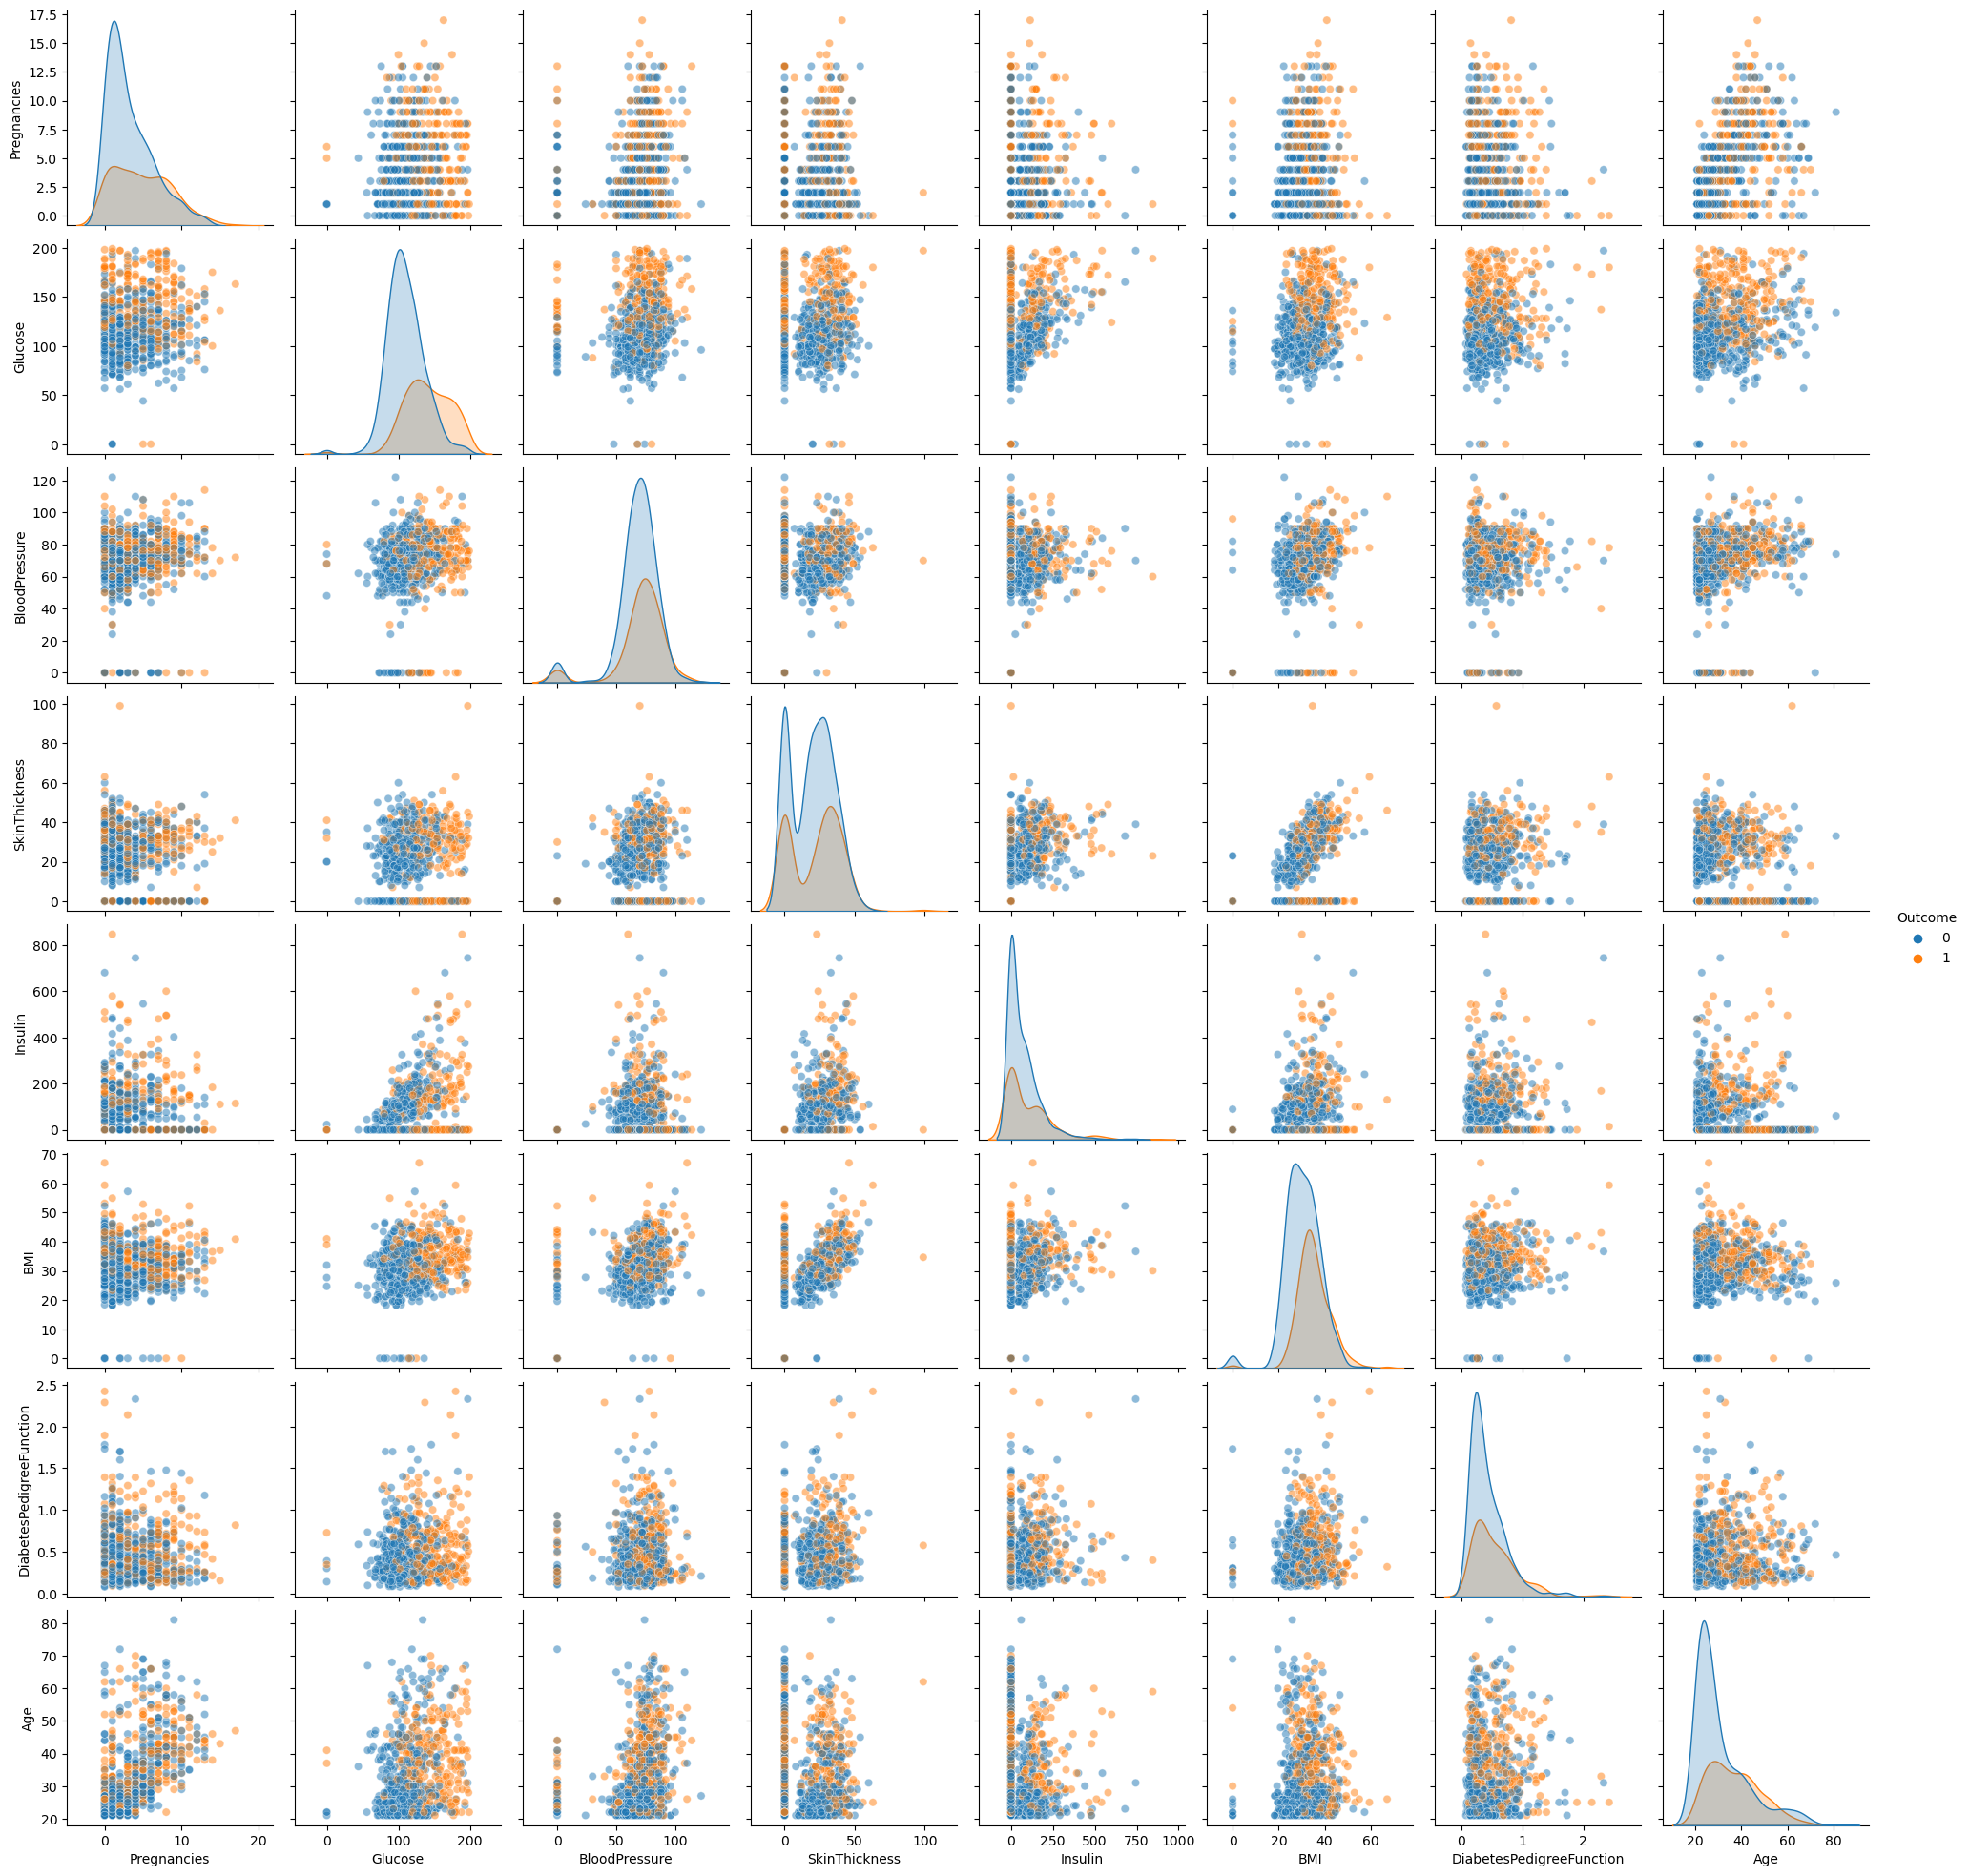

In [14]:
# Pairplot with seaborn
sns.pairplot(data, hue='Outcome', plot_kws={'alpha':0.5})
plt.show()


#

### Checking Class Imbalance

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


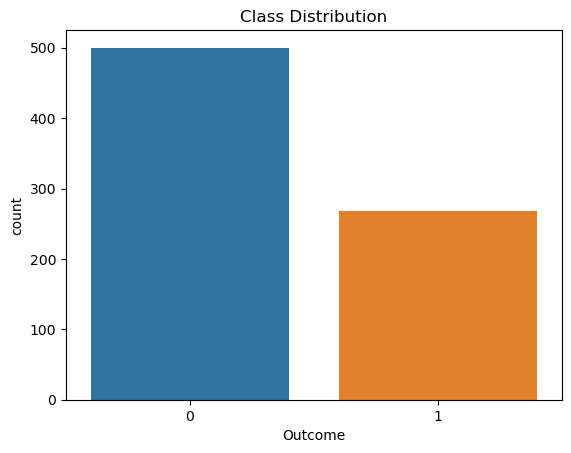

In [17]:
class_counts = data['Outcome'].value_counts()
print(class_counts)

# Calculating proportion of each class
class_proportions = data['Outcome'].value_counts(normalize=True)
print(class_proportions)

# Visualizing class distribution
sns.countplot(x='Outcome', data=data)
plt.title('Class Distribution')
plt.show()

# 

### Function for Training and Evaluating Model

In [20]:
def GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name):
    """
    Perform Grid Search to find the best hyperparameters, train the model, evaluate its performance,
    and visualize the results.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Testing feature set.
    y_train (Series): Training target variable.
    y_test (Series): Testing target variable.
    model (estimator): Machine learning model to be trained and evaluated.
    param_grid (dict or list of dicts): Hyperparameters and their values for Grid Search.
    model_name (str): Name of the model, used for display purposes.

    Returns:
    best_model (estimator): The best estimator found by Grid Search.
    """
    
    # Grid Search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    # the best model from Grid Search
    best_model = grid_search.best_estimator_

    # Displaying the best hyperparameters and the score
    print(f"Tuned hyperparameters: (best parameters) {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

    # Evaluating the model on the test set
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Displaying evaluation metrics
    print(f"{model_name} - Accuracy: {accuracy}")
    print(f"{model_name} - Precision: {precision}")
    print(f"{model_name} - Recall: {recall}")
    print(f"{model_name} - F1 Score: {f1}")
    print(f"{model_name} - ROC AUC: {roc_auc}")

    # Visualizing the Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Plotting the ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='best')
    plt.show()
    
    return best_model


#

### Splitting data and Scaling features

In [23]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print ('The shape of X_train is: ' + str(X_train_scaled.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('m = %d training examples' % (len(y_train)))

The shape of X_train is: (614, 8)
The shape of y_train is: (614,)
m = 614 training examples


#

# MODEL 1 - Logistic Regression

Tuned hyperparameters: (best parameters) {'C': 0.1, 'penalty': 'l2'}
Best score: 0.8320433773566848
Logistic Regression - Accuracy: 0.7597402597402597
Logistic Regression - Precision: 0.6607142857142857
Logistic Regression - Recall: 0.6727272727272727
Logistic Regression - F1 Score: 0.6666666666666666
Logistic Regression - ROC AUC: 0.8176308539944903


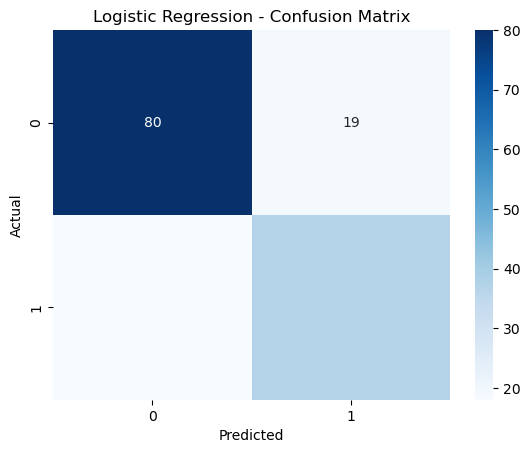

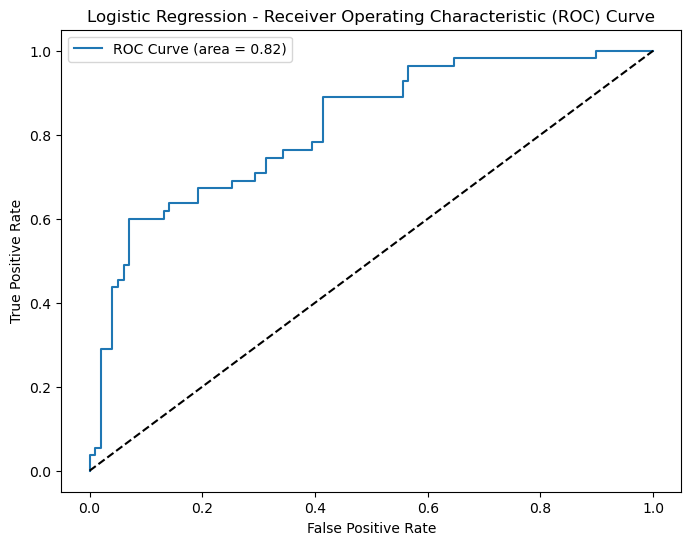

                          Coefficient
Pregnancies                  0.199778
Glucose                      0.919248
BloodPressure               -0.184934
SkinThickness                0.029211
Insulin                     -0.135886
BMI                          0.655919
DiabetesPedigreeFunction     0.208443
Age                          0.374707


In [26]:
# Building Logistic Regression model
log_reg = LogisticRegression(random_state=1, solver='liblinear')
param_grid_log_reg = {"C": np.logspace(-3, 3, 7), #Regularization parameter
                      "penalty": ["l1", "l2"]}  # Regularization penalty (l1 = Lasso, l2 = Ridge)

#implementing function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_model_log = GridSearch_Train_Evaluate(X_train_scaled, X_test_scaled, y_train, y_test, log_reg, param_grid_log_reg, "Logistic Regression")

# How features contribute to prediction
coefficients = pd.DataFrame(best_model_log.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

In [27]:
#Model predictions score on training and test sets using LInear Regression
y_pred_train_log = best_model_log.predict(X_train_scaled)
y_pred_test_log = best_model_log.predict(X_test_scaled)

train_score_log =accuracy_score(y_train, y_pred_train_log)
test_score_log = accuracy_score(y_test, y_pred_test_log)

print(f'LOG Train Score: {train_score_log}')
print(f'LOG Test Score:{test_score_log}')

LOG Train Score: 0.7671009771986971
LOG Test Score:0.7597402597402597


#

# MODEL 2 - SVM

Tuned hyperparameters: (best parameters) {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.8337781298278714
SVM - Accuracy: 0.7337662337662337
SVM - Precision: 0.6458333333333334
SVM - Recall: 0.5636363636363636
SVM - F1 Score: 0.6019417475728155
SVM - ROC AUC: 0.8049586776859504


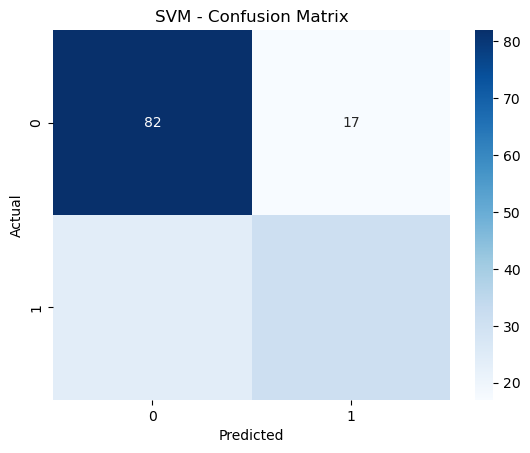

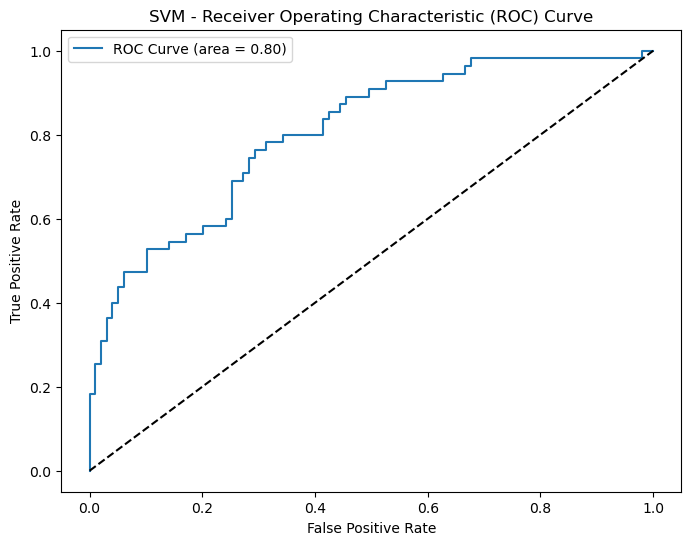

In [30]:
#Building SVM model
svm = SVC(probability=True, random_state=1)
param_grid_svm = {"C": [0.01, 0.1, 1, 10, 100],#Regularization parameter
                  'kernel': [ 'poly', 'rbf', 'sigmoid'],#Kernel type
                  'gamma': ['scale', 'auto']}#Kernel Coeffecient

#implementing function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_model_svm= GridSearch_Train_Evaluate(X_train_scaled, X_test_scaled, y_train, y_test, svm, param_grid_svm, "SVM")



In [31]:
#Model predictions score on training and test sets using SVM

y_pred_train_svm = best_model_svm.predict(X_train_scaled)
y_pred_test_svm = best_model_svm.predict(X_test_scaled)

train_score_svm =accuracy_score(y_train, y_pred_train_svm)
test_score_svm = accuracy_score(y_test, y_pred_test_svm)

print(f'SVM Train Score: {train_score_svm}')
print(f'SVM Test Score:{test_score_svm}')




SVM Train Score: 0.8338762214983714
SVM Test Score:0.7337662337662337


### 

# MODEL 3 - Naive Bayes

Tuned hyperparameters: (best parameters) {}
Best score: 0.806225749559083
Naive Bayes - Accuracy: 0.7662337662337663
Naive Bayes - Precision: 0.6610169491525424
Naive Bayes - Recall: 0.7090909090909091
Naive Bayes - F1 Score: 0.6842105263157895
Naive Bayes - ROC AUC: 0.8253443526170798


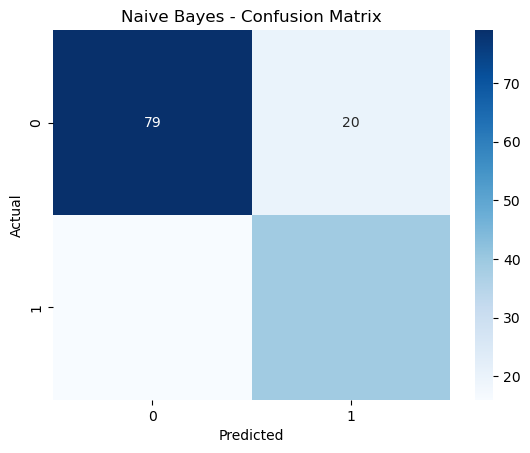

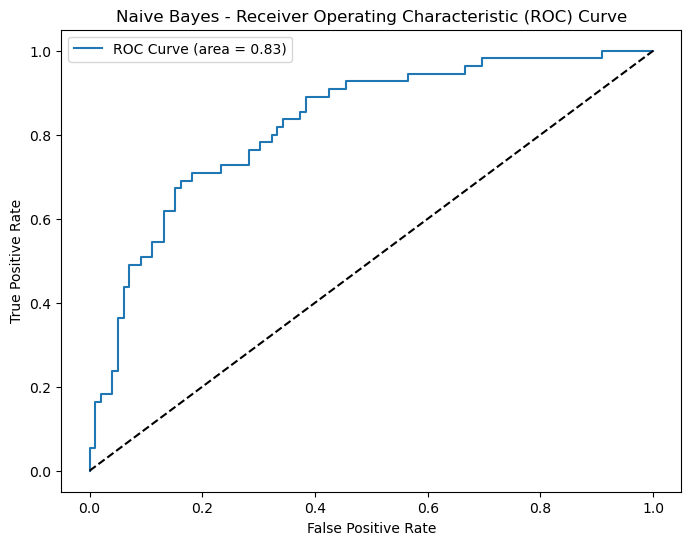

In [34]:
#Building Gaussian Naive Bayes model
nb = GaussianNB()
param_grid_nb = {}#Naive bayes have no hyperparameter tuning


#implementing function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_model_nb = GridSearch_Train_Evaluate(X_train_scaled, X_test_scaled, y_train, y_test, nb, param_grid_nb, "Naive Bayes")

In [35]:
#Model predictions score on training and test sets using SVM

y_pred_train_nb = best_model_nb.predict(X_train_scaled)
y_pred_test_nb = best_model_nb.predict(X_test_scaled)

train_score_nb = accuracy_score(y_train, y_pred_train_nb)
test_score_nb = accuracy_score(y_test, y_pred_test_nb)

print(f'Gaussian Naive Bayes Train Score: {train_score_nb}')
print(f'Gaussian Naive Bayes Test Score:{test_score_nb}')


Gaussian Naive Bayes Train Score: 0.752442996742671
Gaussian Naive Bayes Test Score:0.7662337662337663


#

# MODEL 4 - KNN

Tuned hyperparameters: (best parameters) {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best score: 0.8069962778393013
KNN - Accuracy: 0.7207792207792207
KNN - Precision: 0.6304347826086957
KNN - Recall: 0.5272727272727272
KNN - F1 Score: 0.5742574257425742
KNN - ROC AUC: 0.7869605142332414


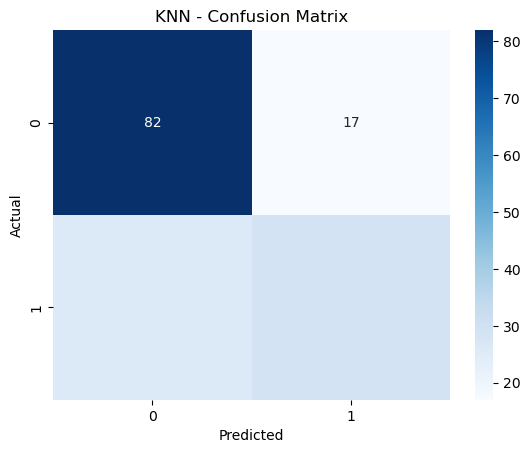

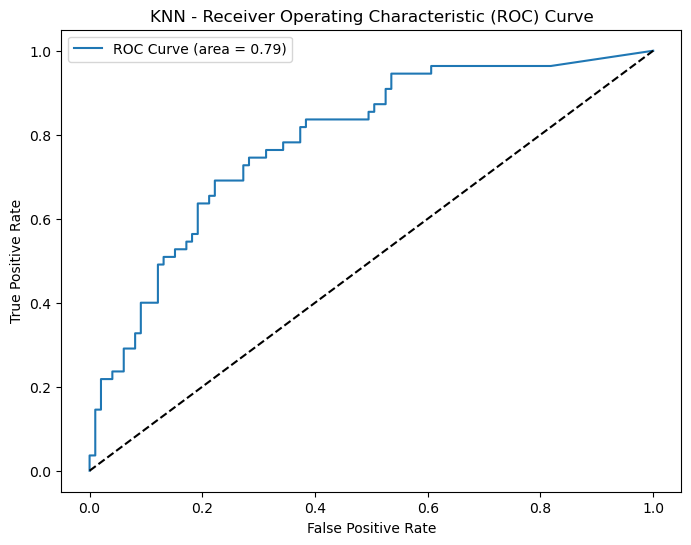

In [38]:
#BUilding KNN model
knn=KNeighborsClassifier()
param_grid_knn ={'n_neighbors':[3,5,7,9,11,13,15],#values for the number of neighbors
    'weights': ['uniform', 'distance'], # Weighting strategies 
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

#implementing the function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_model_knn= GridSearch_Train_Evaluate(X_train_scaled,X_test_scaled,y_train,y_test,knn,param_grid_knn,"KNN")

In [39]:
#Model predictions score on training and test sets using KNN

y_pred_train_knn = best_model_knn.predict(X_train_scaled)
y_pred_test_knn = best_model_knn.predict(X_test_scaled)

train_score_knn = accuracy_score(y_train, y_pred_train_knn)
test_score_knn = accuracy_score(y_test, y_pred_test_knn)

print(f'KNN Train Score: {train_score_knn}')
print(f'KNN Test Score:{test_score_knn}')



KNN Train Score: 1.0
KNN Test Score:0.7207792207792207


#

#

# MODEL 5 - Decision Tree 

Tuned hyperparameters: (best parameters) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.7693564831904625
Decision Tree - Accuracy: 0.7207792207792207
Decision Tree - Precision: 0.62
Decision Tree - Recall: 0.5636363636363636
Decision Tree - F1 Score: 0.5904761904761904
Decision Tree - ROC AUC: 0.7618916437098255


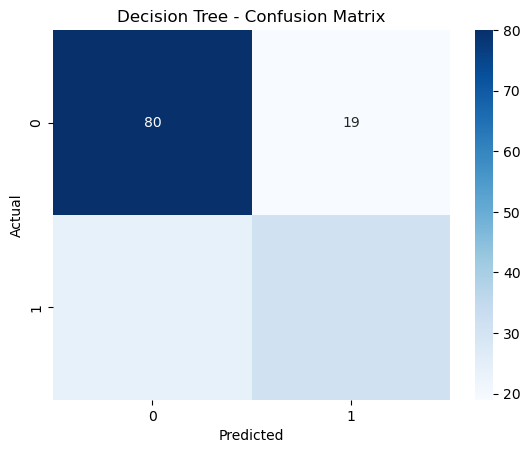

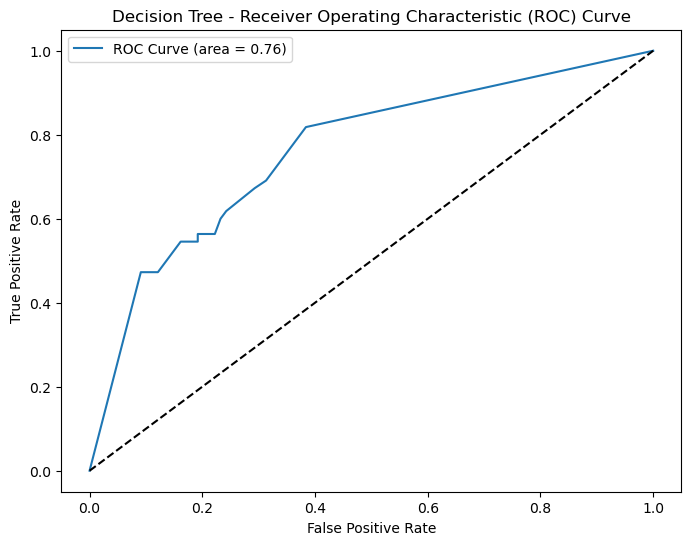

In [43]:
# Define Decision Tree Model and Parameter Grid
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],# Split criteria ('gini', 'entropy', and 'log_loss')
    'max_depth': [None, 10, 20, 30, 40, 50],# Maximum depth of  tree
    'min_samples_split': [2, 5, 10],# Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]# Minimum number of samples required to be in a leaf node.
}

#implementing the function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_model_dt = GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, dt_model, dt_param_grid, 'Decision Tree')


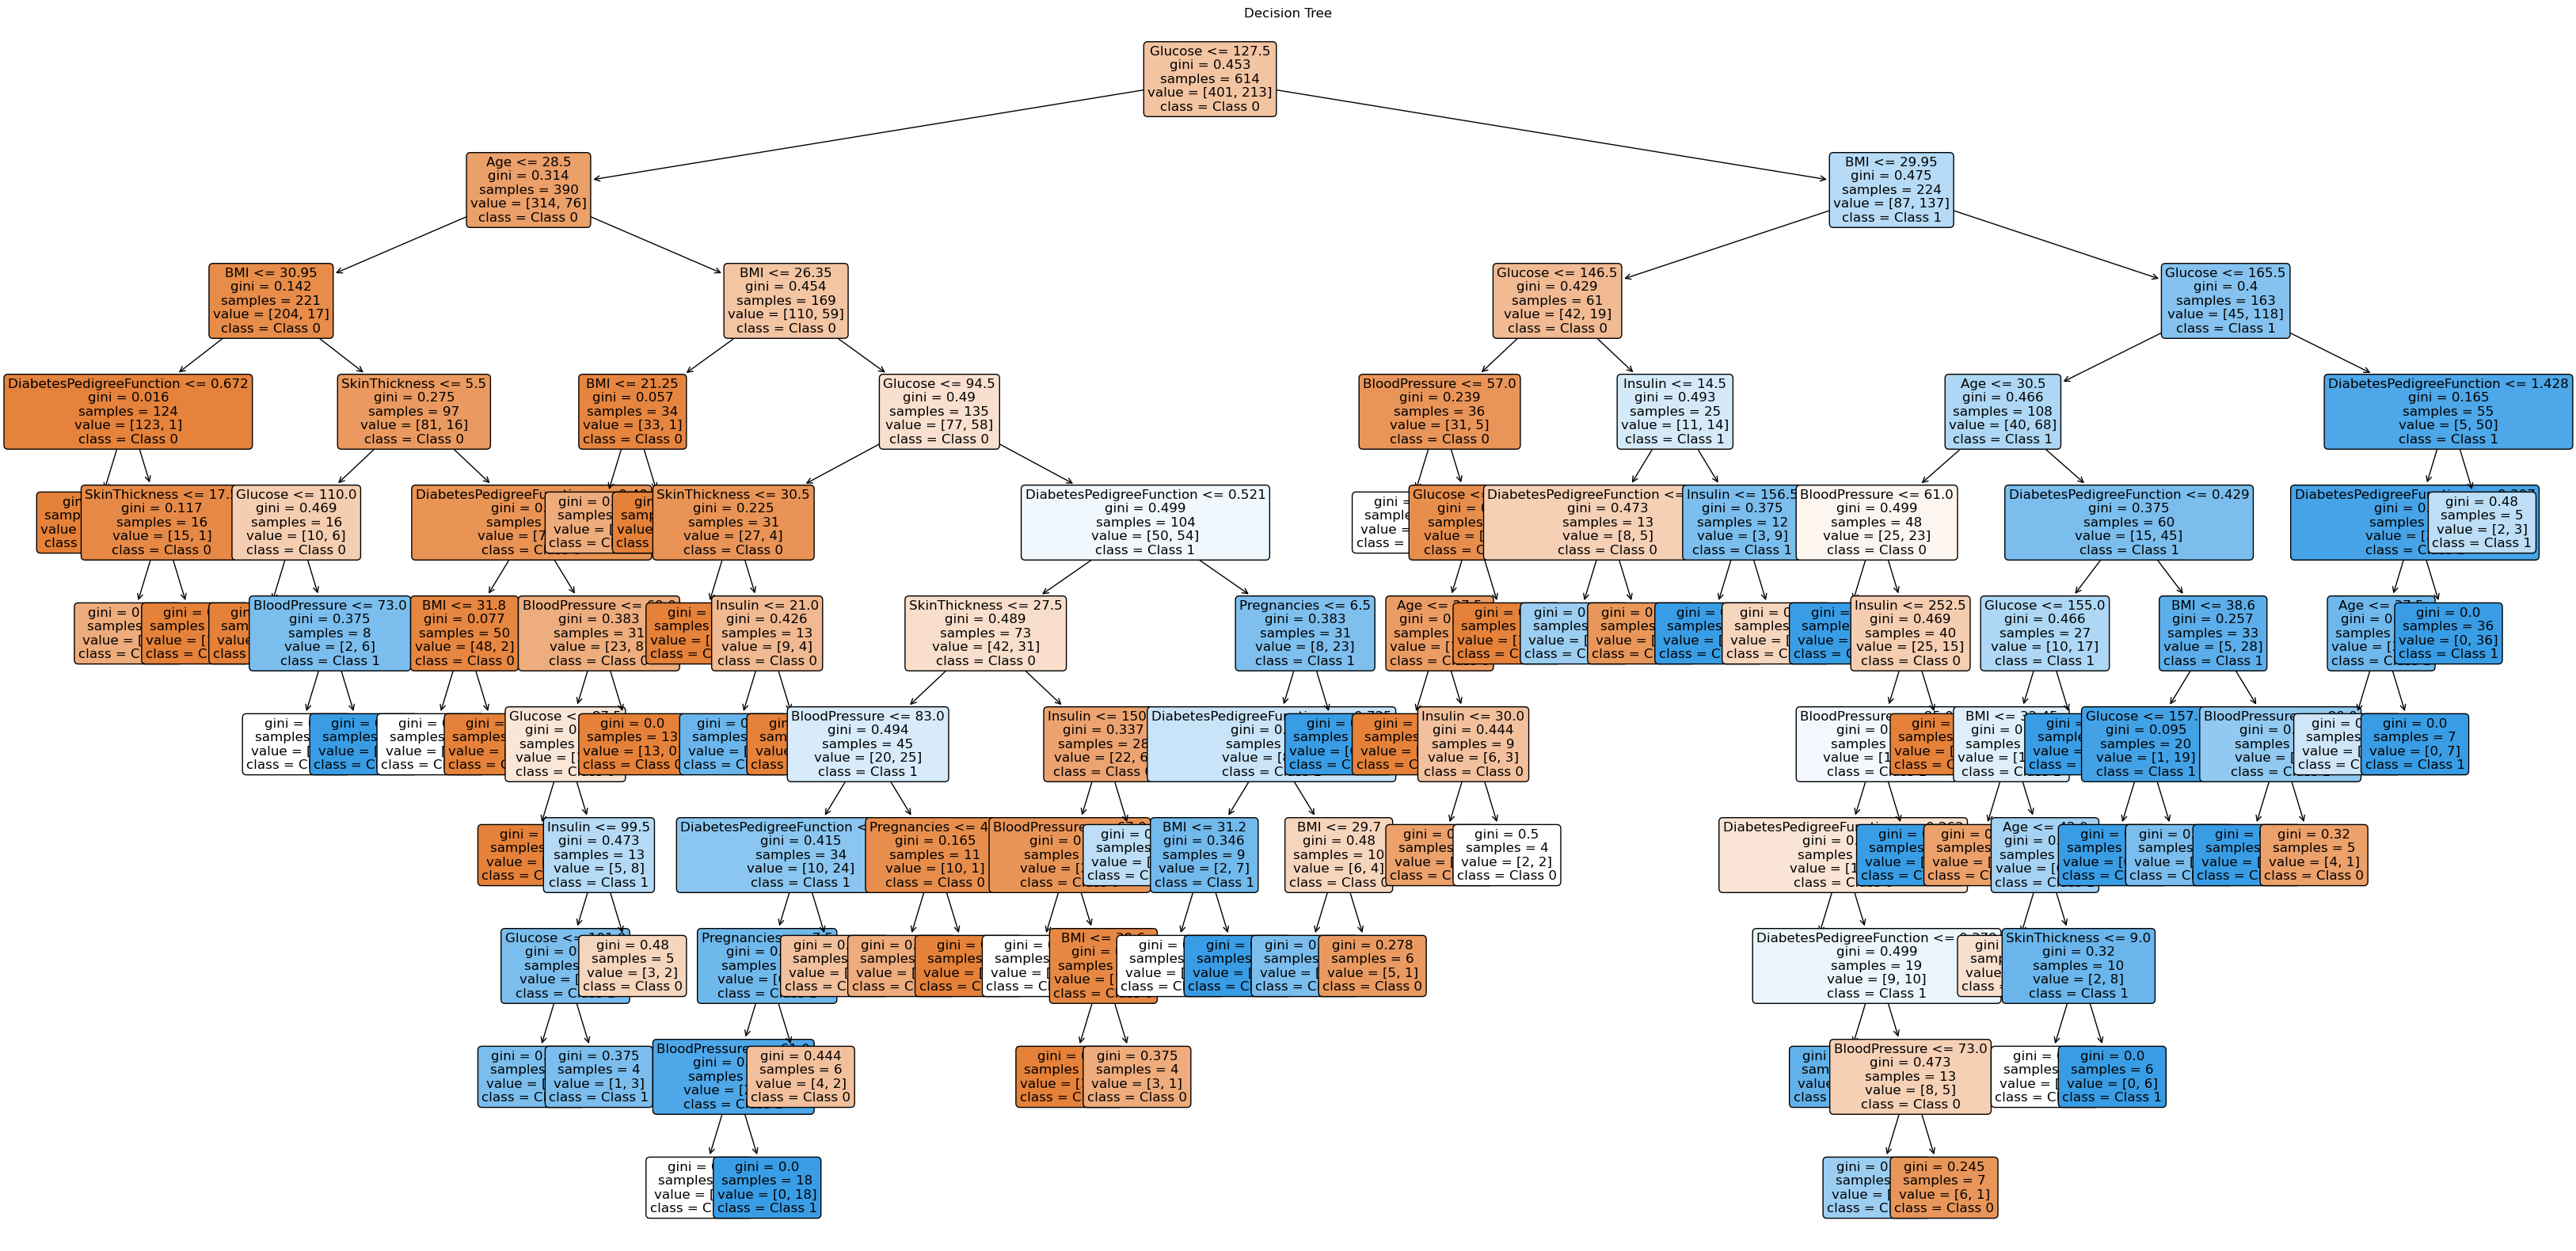

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [44]:
plt.figure(figsize=(40, 20))
plot_tree(best_model_dt, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True, fontsize=12)
plt.title('Decision Tree')
plt.show()
plt.tight_layout

In [45]:
#Model predictions core on training and test sets using Decision Tree

y_pred_train_dt=best_model_dt.predict(X_train_scaled)
y_pred_test_dt=best_model_dt.predict(X_test_scaled)

train_score_dt= accuracy_score(y_train,y_pred_train_dt)
test_score_dt= accuracy_score(y_test,y_pred_test_dt)

print(f'DT Train Score: {train_score_dt}')
print(f'DT Test Score: {test_score_dt}')


DT Train Score: 0.6530944625407166
DT Test Score: 0.6428571428571429


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 

# MODEL 6 - Random Forest


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Tuned hyperparameters: (best parameters) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8448077396333211
Random Forest - Accuracy: 0.7792207792207793
Random Forest - Precision: 0.6909090909090909
Random Forest - Recall: 0.6909090909090909
Random Forest - F1 Score: 0.6909090909090909
Random Forest - ROC AUC: 0.8279155188246098


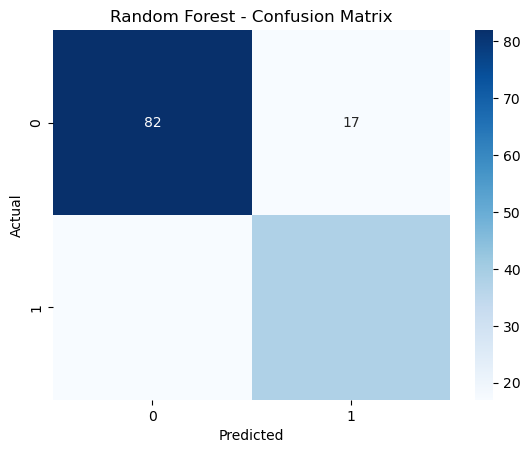

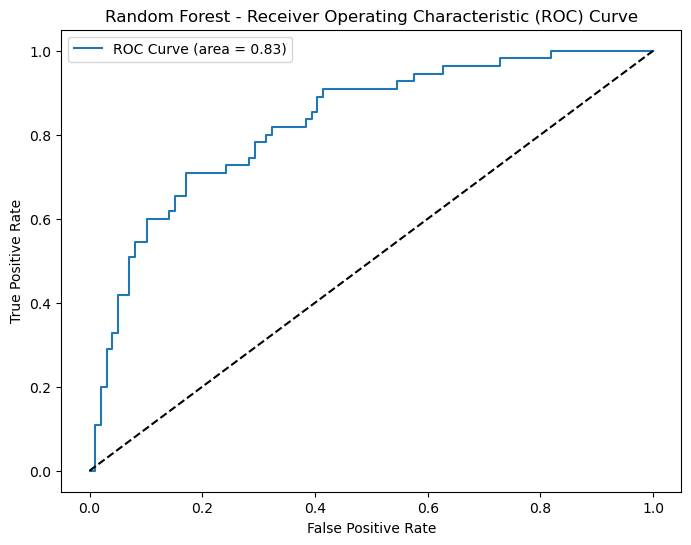

In [48]:
#Elapsed for 1747 seconds
#Building Random Forest Model 
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],# The number of trees in the forest.
    'criterion': ['gini', 'entropy'],# Split criteria ('gini', 'entropy', and 'log_loss')
    'max_depth': [None, 10, 20, 30, 40, 50],# Maximum depth of tree
    'min_samples_split': [2, 5, 10],# Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],#minimum number of samples in a leaf node.
    'max_features': ['auto', 'sqrt', 'log2'],# number of features to consider when looking for the best split.
    'bootstrap': [True, False]
}
#implementing the function "GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, model, param_grid, model_name)"
best_rf_model = GridSearch_Train_Evaluate(X_train, X_test, y_train, y_test, rf_model, param_grid_rf, 'Random Forest')


In [58]:
#Model predictions core on training and test sets using Decision Tree

y_pred_train_rf=best_rf_model.predict(X_train_scaled)
y_pred_test_rf=best_rf_model.predict(X_test_scaled)

train_score_rf= accuracy_score(y_train,y_pred_train_rf)
test_score_rf= accuracy_score(y_test,y_pred_test_rf)

print(f'RF Train Score: {train_score_rf}')
print(f'RF Test Score: {test_score_rf}')

RF Train Score: 0.6530944625407166
RF Test Score: 0.6428571428571429


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###

### PCA

In [73]:
# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Tuned hyperparameters: (best parameters) {'C': 0.01, 'penalty': 'l2'}
Best score: 0.7698058768439906
Logistic Regression PCA - Accuracy: 0.6883116883116883
Logistic Regression PCA - Precision: 0.5714285714285714
Logistic Regression PCA - Recall: 0.509090909090909
Logistic Regression PCA - F1 Score: 0.5384615384615383
Logistic Regression PCA - ROC AUC: 0.7373737373737372


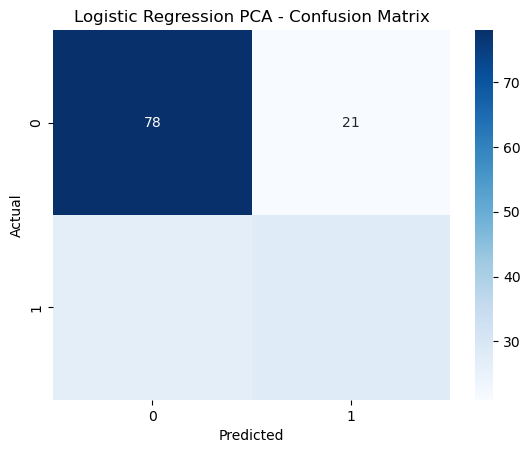

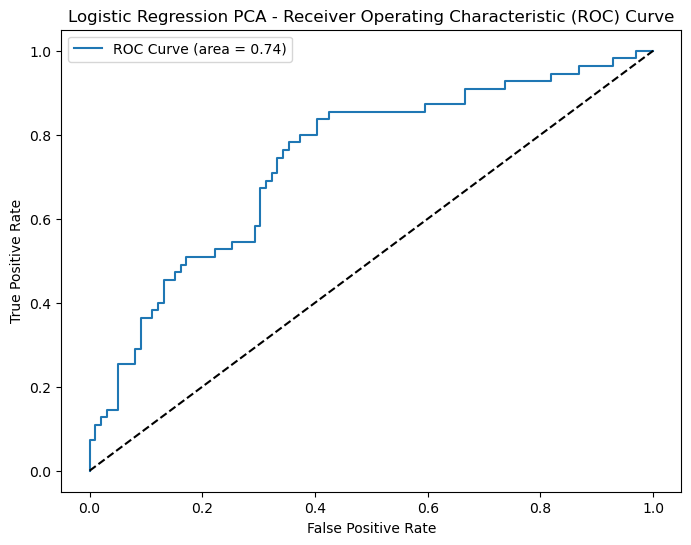

Tuned hyperparameters: (best parameters) {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.7712064380733631
SVM PCA - Accuracy: 0.6428571428571429
SVM PCA - Precision: 0.0
SVM PCA - Recall: 0.0
SVM PCA - F1 Score: 0.0
SVM PCA - ROC AUC: 0.7548209366391184


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


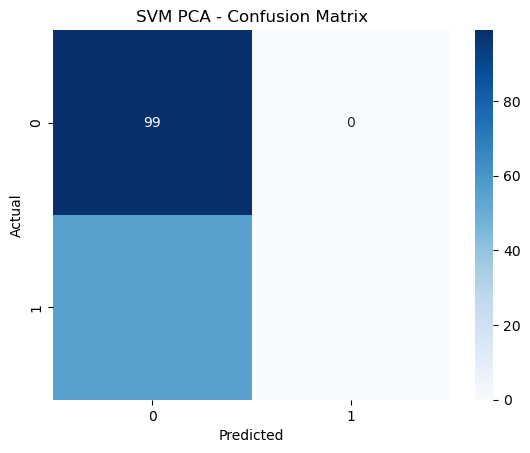

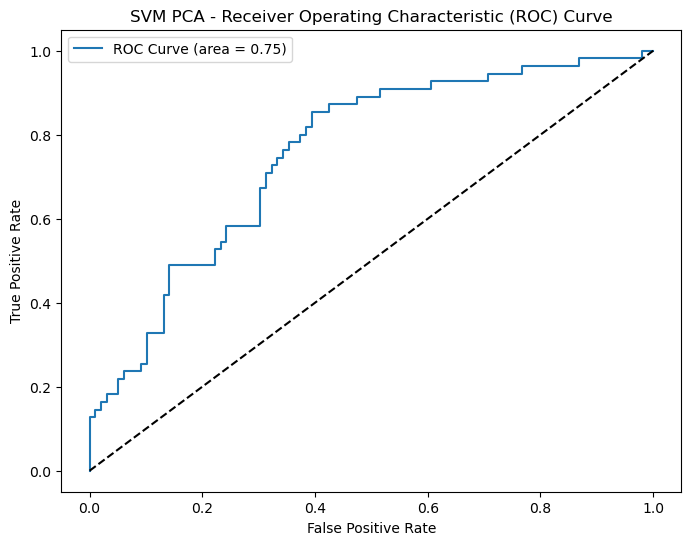

Tuned hyperparameters: (best parameters) {}
Best score: 0.7664232564975461
Naive Bayes PCA - Accuracy: 0.7077922077922078
Naive Bayes PCA - Precision: 0.6086956521739131
Naive Bayes PCA - Recall: 0.509090909090909
Naive Bayes PCA - F1 Score: 0.5544554455445544
Naive Bayes PCA - ROC AUC: 0.7408631772268136


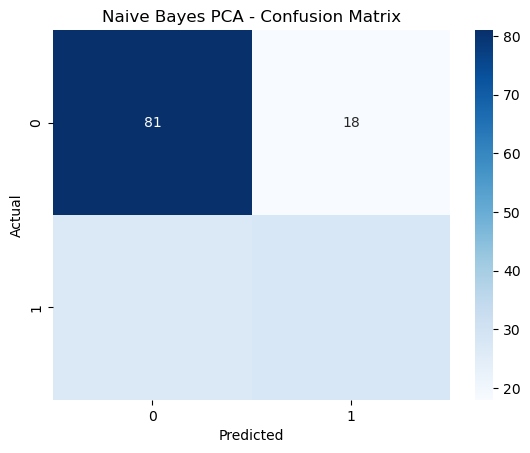

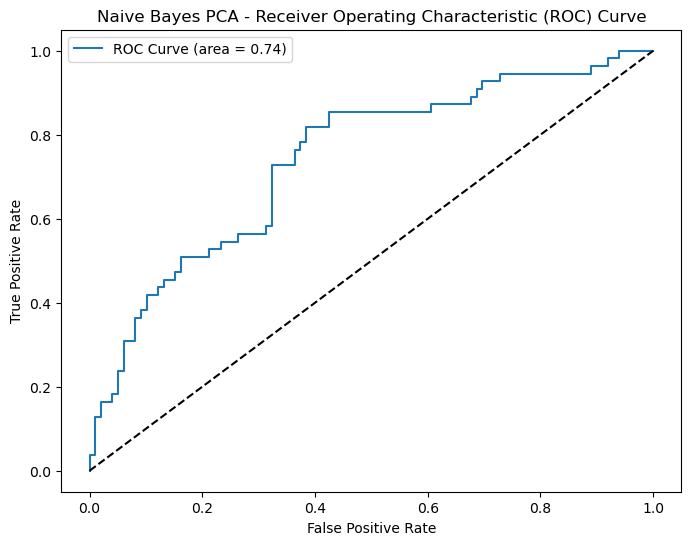

Tuned hyperparameters: (best parameters) {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best score: 0.7405263917941566
KNN PCA - Accuracy: 0.7402597402597403
KNN PCA - Precision: 0.6470588235294118
KNN PCA - Recall: 0.6
KNN PCA - F1 Score: 0.6226415094339622
KNN PCA - ROC AUC: 0.7538108356290174


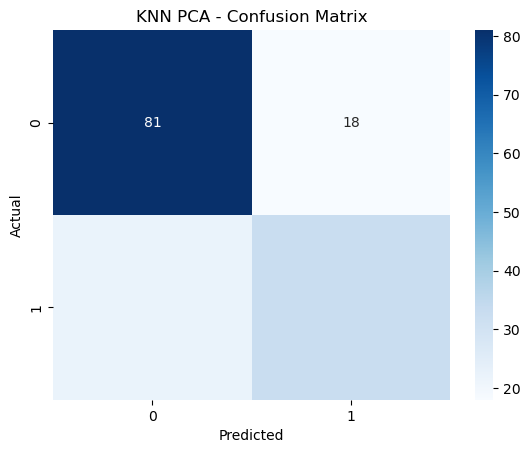

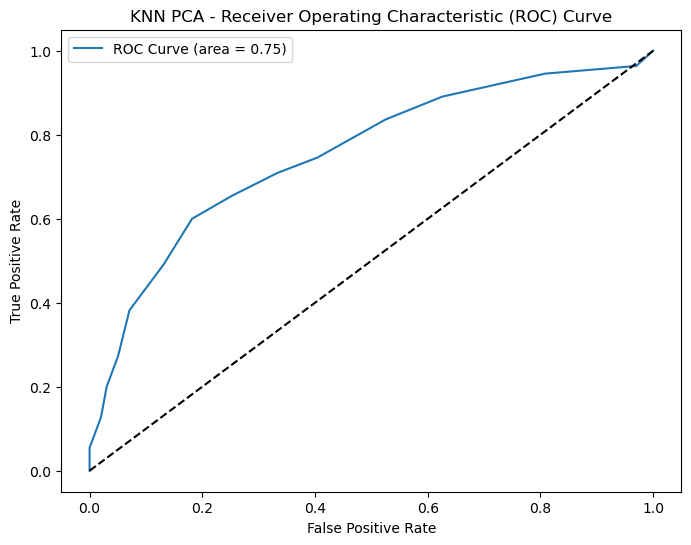

Tuned hyperparameters: (best parameters) {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.6765736041042889
Decision Tree PCA - Accuracy: 0.6298701298701299
Decision Tree PCA - Precision: 0.48
Decision Tree PCA - Recall: 0.43636363636363634
Decision Tree PCA - F1 Score: 0.4571428571428572
Decision Tree PCA - ROC AUC: 0.6331496786042241


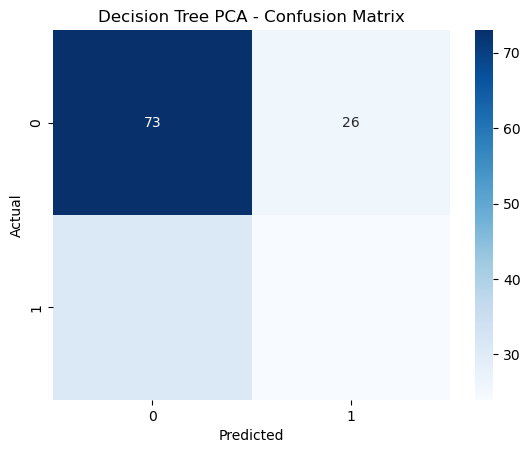

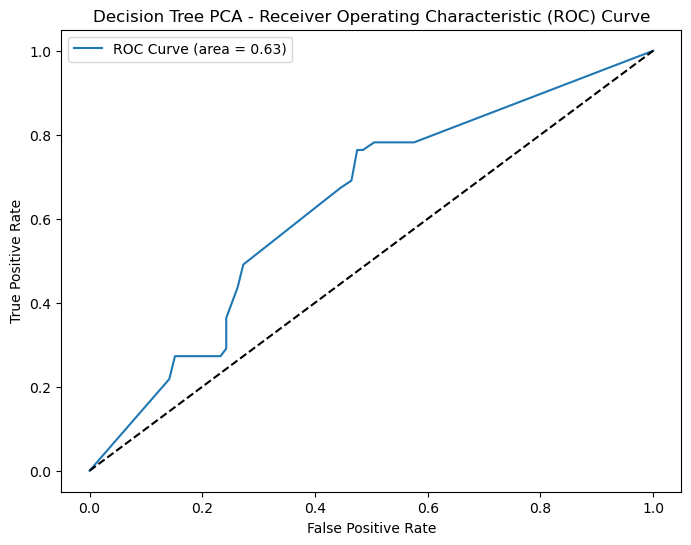

C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

In [ ]:
log_reg_pca = GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, log_reg, param_grid_log_reg, "Logistic Regression PCA")

svm_pca = GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, svm, param_grid_svm, "SVM PCA")

nb_pca = GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, nb, param_grid_nb, "Naive Bayes PCA")

knn_pca = GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, knn, param_grid_knn, "KNN PCA")

dt_pca =GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, dt_model, dt_param_grid, "Decision Tree PCA")

rf_pca=GridSearch_Train_Evaluate(X_train_pca, X_test_pca, y_train, y_test, rf_model, param_grid_rf, "Random FOrest PCA")

print(log_reg_pca)
print(svm_pca)
print(nb_pca)
print(knn_pca)
print(dt_pca)
print(rf_pca)

###  

### decision Boundaries

In [71]:
# Function to plot the decision boundary and points
def plot_decision_boundary(model, X, y, ax, title):
    # Define the grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create a contour plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    
    # Plot the points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['red', 'blue']))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    ax.set_title(title)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# plotting the subplots to visualize decision boundaries
fig, axs = plt.subplots(6, 2, figsize=(15, 30))

# Logistic Regression
plot_decision_boundary(log_reg_pca, X_train_pca, y_train, axs[0, 0], 'Logistic Regression (Training Data)')
plot_decision_boundary(log_reg_pca, X_test_pca, y_test, axs[0, 1], 'Logistic Regression (Test Data)')

# SVM
plot_decision_boundary(svm_pca, X_train_pca, y_train, axs[1, 0], 'SVM (Training Data)')
plot_decision_boundary(svm_pca, X_test_pca, y_test, axs[1, 1], 'SVM (Test Data)')

# Naive Bayes
plot_decision_boundary(nb_pca, X_train_pca, y_train, axs[2, 0], 'Naive Bayes (Training Data)')
plot_decision_boundary(nb_pca, X_test_pca, y_test, axs[2, 1], 'Naive Bayes (Test Data)')

# KNN
plot_decision_boundary(knn_pca, X_train_pca, y_train, axs[3, 0], 'KNN (Training Data)')
plot_decision_boundary(knn_pca, X_test_pca, y_test, axs[3, 1], 'KNN (Test Data)')

# Decision Tree
plot_decision_boundary(dt_pca, X_train_pca, y_train, axs[4, 0], 'Decision Tree (Training Data)')
plot_decision_boundary(dt_pca, X_test_pca, y_test, axs[4, 1], 'Decision Tree (Test Data)')

# Random Forest
plot_decision_boundary(rf_pca, X_train_pca, y_train, axs[5, 0], 'Random Forest (Training Data)')
plot_decision_boundary(rf_pca, X_test_pca, y_test, axs[5, 1], 'Random Forest (Test Data)')

plt.tight_layout()
plt.show()


# 

# Summary of findings


In [ ]:
summary = f"""
===============================
1) Evaluation Metrics with Logistic Regression:
------------------------------------------
Tuned hyperparameters: (best parameters) {{'C': 0.1, 'penalty': 'l2'}}

Best score: 0.8320433773566848
Logistic Regression - Accuracy: 0.7597402597402597
Logistic Regression - Precision: 0.6607142857142857
Logistic Regression - Recall: 0.6727272727272727
Logistic Regression - F1 Score: 0.6666666666666666
Logistic Regression - ROC AUC: 0.8176308539944903

LOG Train Score: 0.7671009771986971
LOG Test Score: 0.7597402597402597

Decision Boundary: linear, shows good generalization.


2) Evaluation Metrics with SVM:
------------------------------------------
Tuned hyperparameters: (best parameters) {{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}}
Best score: 0.8337781298278714

SVM - Accuracy: 0.7337662337662337
SVM - Precision: 0.6458333333333334
SVM - Recall: 0.5636363636363636
SVM - F1 Score: 0.6019417475728155
SVM - ROC AUC: 0.8049586776859504

SVM Train Score: 0.8338762214983714
SVM Test Score:0.7337662337662337

Decision Boundary:curved because I used the RBF kernel, shows more overfitting and less generalization than Logistic Regression.


3) Evaluation Metrics with Naive Bayes:
------------------------------------------
Tuned hyperparameters: (best parameters) {{None}}

Best score: 0.806225749559083
Naive Bayes - Accuracy: 0.7662337662337663
Naive Bayes - Precision: 0.6610169491525424
Naive Bayes - Recall: 0.7090909090909091
Naive Bayes - F1 Score: 0.6842105263157895
Naive Bayes - ROC AUC: 0.8253443526170798

Gaussian Naive Bayes Train Score: 0.752442996742671
Gaussian Naive Bayes Test Score: 0.7662337662337663

Decision Boundary:curved because Naive Bayes is based on probability, and it shows good generalization.


4) Evaluation Metrics with KNN:
------------------------------------------
Tuned hyperparameters: (best parameters) {{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}}

Best score: 0.8069962778393013
KNN - Accuracy: 0.7207792207792207
KNN - Precision: 0.6304347826086957
KNN - Recall: 0.5272727272727272
KNN - F1 Score: 0.5742574257425742
KNN - ROC AUC: 0.7869605142332414

KNN Train Score: 1.0
KNN Test Score: 0.7207792207792207

Decision Boundary:complex, showing significant overfitting.


5) Evaluation Metrics with Decision Tree:
------------------------------------------
Tuned hyperparameters: (best parameters) {{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}}

Best score: 0.7693564831904625
Decision Tree - Accuracy: 0.7207792207792207
Decision Tree - Precision: 0.62
Decision Tree - Recall: 0.5636363636363636
Decision Tree - F1 Score: 0.5904761904761904
Decision Tree - ROC AUC: 0.7618916437098255

DT Train Score: 0.6530944625407166
DT Test Score: 0.6428571428571429

Decision Boundary:complex, showing significant overfitting.


6) Evaluation Metrics with Random Forest:
------------------------------------------
Tuned hyperparameters: (best parameters) {{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}}

Best score: 0.8448077396333211
Random Forest - Accuracy: 0.7792207792207793
Random Forest - Precision: 0.6909090909090909
Random Forest - Recall: 0.6909090909090909
Random Forest - F1 Score: 0.6909090909090909
Random Forest - ROC AUC: 0.8279155188246098

RF Train Score: 0.6530944625407166
RF Test Score: 0.6428571428571429

Decision Boundary: complex, shows better generalization and less overfitting than a single decision tree.


\033[1mAnalysis:\033[0m
------------------------------------------

- **Highest ROC AUC**: Random Forest (0.8279)
- **Highest Accuracy**: Random Forest (0.7792)
- **Best Precision**: Random Forest (0.6909)
- **Best Recall**: Naive Bayes (0.7091)
- **Best F1 Score**: Random Forest (0.6909)
- **Best Generalization**: Logistic Regression

\033[1mConclusion:\033[0m
**Best Model**:
1) Random Forest
2) Logistic Regression
"""

print(summary)


# 